# LOAN DEFAULT PREDICTION


#### By Anil kumar , BCA 5th sem , univ roll= 1919611

###### Objective of this project is to predict if the loanee will be defaulter or not . we will use the custom dataset available on the kaggle . we will be use the simple and basic Data Science and Machine Learning method to execute the solution.

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= pd.read_csv('Default_Fin.csv')
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [5]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [6]:
df.tail()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


In [7]:
df.shape

(10000, 5)

In [8]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [10]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [11]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [12]:
df.corr()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
Index,1.000000,-0.002597,0.010342,-0.001427,-0.005135
Employed,-0.002597,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,0.010342,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,-0.001427,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.005135,-0.035420,0.350119,-0.019871,1.000000


<AxesSubplot:>

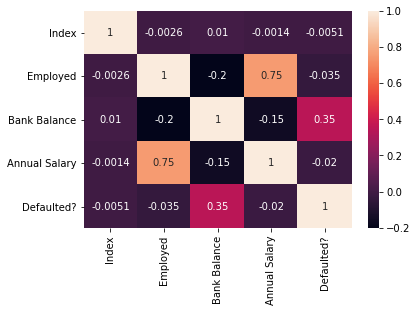

In [13]:
sns.heatmap(df.corr(),annot =True)

In [14]:
x= df.drop(['Defaulted?'],axis = "columns")
y= df["Defaulted?"]

In [15]:
# importing required libraries for splitting data 
from sklearn.model_selection import train_test_split

#now we will divide data into dataset x_train and y_train as Training variables ,
#x_test and y_test as testing variables
# making the ratio of 70% training and 30% testing  as it is most efficient ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=101)

In [16]:
#importing logistic regression 
from sklearn.linear_model import LogisticRegression

#storing the logistic regression in lr variable
lr=LogisticRegression()

In [17]:
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
pred=lr.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn import metrics

In [20]:
metrics.mean_absolute_error(y_test,pred)

0.03333333333333333

In [21]:
metrics.mean_squared_error(y_test,pred)

0.03333333333333333

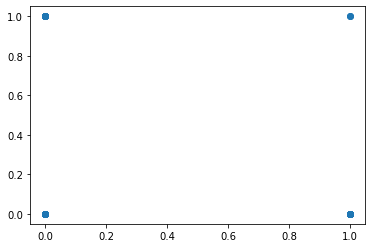

In [22]:
plt.scatter(y_test,pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Defaulted?', ylabel='Density'>

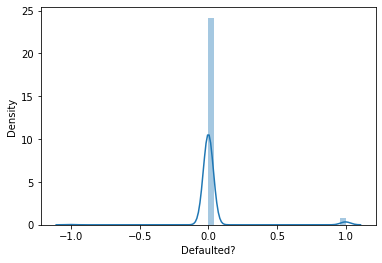

In [23]:
sns.distplot(y_test-pred)

In [24]:
lr.score(x_train,y_train)

0.9632857142857143

In [25]:
lr.score(x_test,y_test)

0.9666666666666667

## we can conclude that ,
## we have succesfully built a 
## machine learning model to predict the loan defaulters 
## using a custom dataset with a training accuracy of 96.32%
## approximately and tetsing accuracy of 96.66% 
